In [1]:
import pandas as pd

unicorns_data = pd.read_csv('unicorns till sep 2022.csv')

unicorns_data.head(), unicorns_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


(     Company Valuation ($B) Date Joined        Country          City   \
 0  ByteDance           $140    4/7/2017          China        Beijing   
 1     SpaceX           $127   12/1/2012  United States      Hawthorne   
 2      SHEIN           $100    7/3/2018          China       Shenzhen   
 3     Stripe            $95   1/23/2014  United States  San Francisco   
 4      Canva            $40    1/8/2018      Australia    Surry Hills   
 
                           Industry  \
 0          Artificial intelligence   
 1                            Other   
 2  E-commerce & direct-to-consumer   
 3                          Fintech   
 4     Internet software & services   
 
                                            Investors  
 0  Sequoia Capital China, SIG Asia Investments, S...  
 1  Founders Fund, Draper Fisher Jurvetson, Rothen...  
 2  Tiger Global Management, Sequoia Capital China...  
 3        Khosla Ventures, LowercaseCapital, capitalG  
 4  Sequoia Capital China, Blackbird V

Growth of Unicorn Companies Over Time


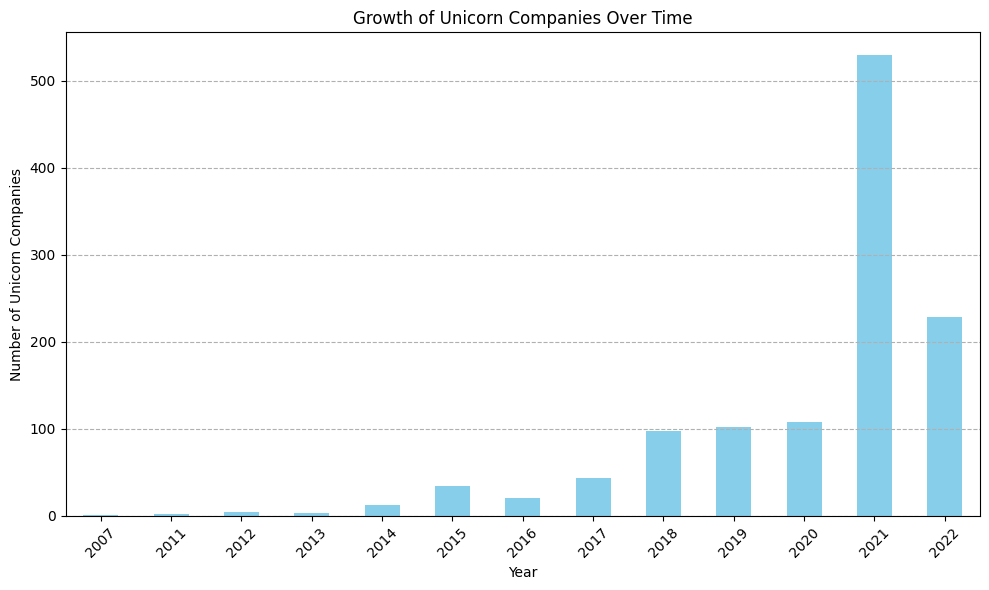

In [2]:
import matplotlib.pyplot as plt
unicorns_data['Date Joined'] = pd.to_datetime(unicorns_data['Date Joined'])
unicorns_data['Year Joined'] = unicorns_data['Date Joined'].dt.year
unicorns_per_year = unicorns_data.groupby('Year Joined').size()
plt.figure(figsize=(10, 6))
unicorns_per_year.plot(kind='bar', color='skyblue')
plt.title('Growth of Unicorn Companies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Unicorn Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


Geographical Analysis


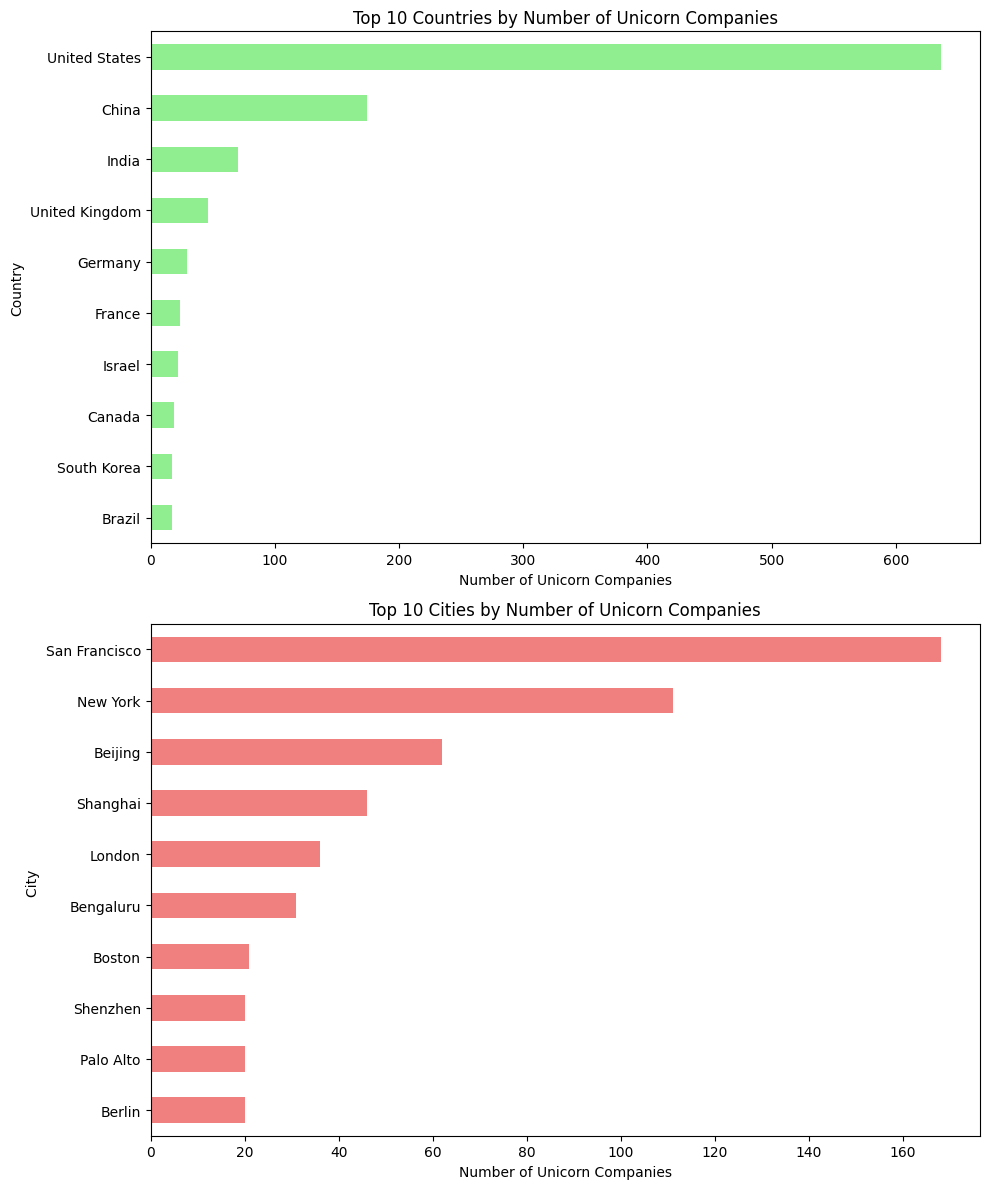

In [3]:
unicorns_by_country = unicorns_data.groupby('Country').size().sort_values(ascending=False)

unicorns_by_city = unicorns_data.groupby('City ').size().sort_values(ascending=False)
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
unicorns_by_country.head(10).plot(kind='barh', ax=ax[0], color='lightgreen')
ax[0].set_title('Top 10 Countries by Number of Unicorn Companies')
ax[0].invert_yaxis()  
ax[0].set_xlabel('Number of Unicorn Companies')
unicorns_by_city.head(10).plot(kind='barh', ax=ax[1], color='lightcoral')
ax[1].set_title('Top 10 Cities by Number of Unicorn Companies')
ax[1].invert_yaxis() 
ax[1].set_xlabel('Number of Unicorn Companies')
plt.tight_layout()
plt.show()


Industry Analysis

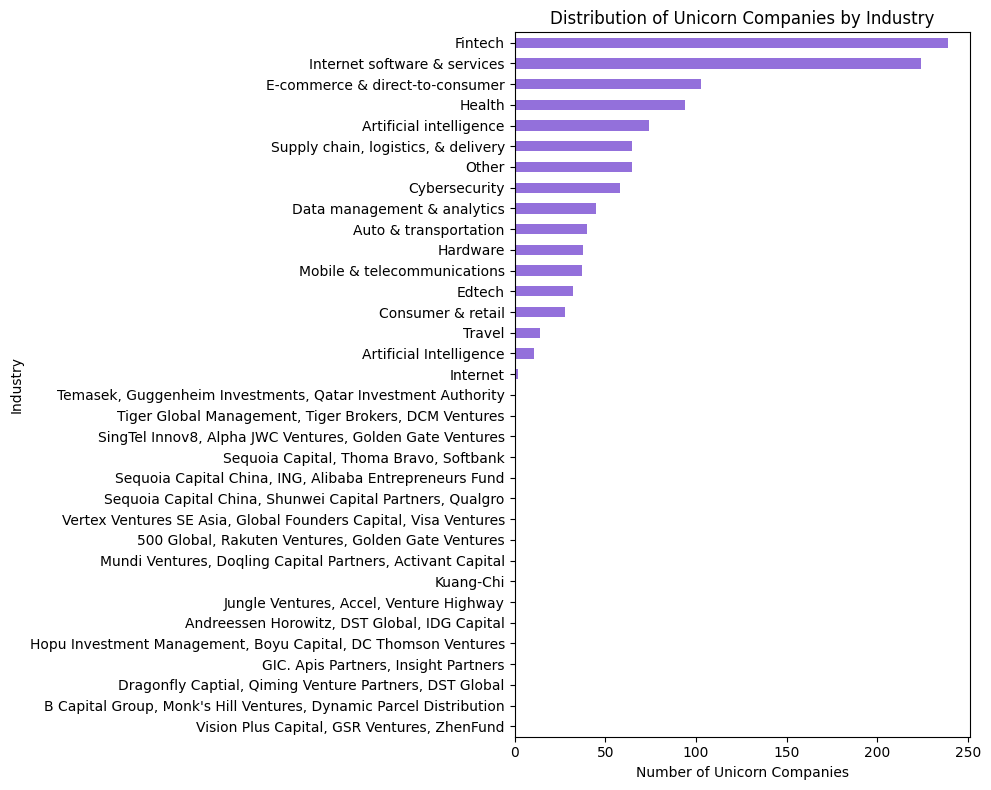

In [4]:
unicorns_by_industry = unicorns_data.groupby('Industry').size().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
unicorns_by_industry.plot(kind='barh', color='mediumpurple')
plt.title('Distribution of Unicorn Companies by Industry')
plt.xlabel('Number of Unicorn Companies')
plt.ylabel('Industry')
plt.tight_layout()
plt.gca().invert_yaxis() 
plt.show()


Key Investors in Unicorn Companies

<Figure size 1000x800 with 0 Axes>

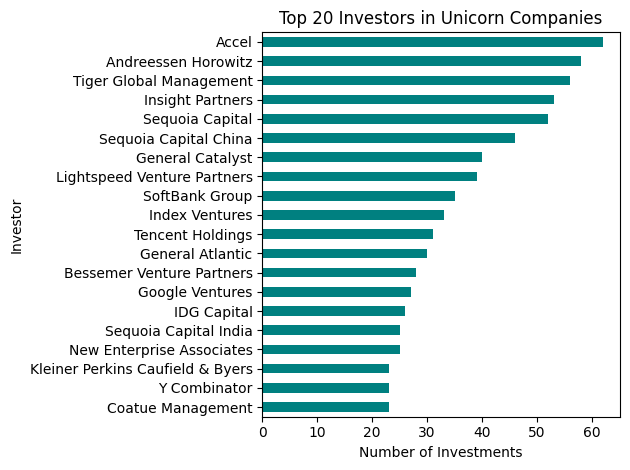

In [6]:
from collections import Counter

all_investors = unicorns_data['Investors'].str.split(', ').dropna().sum()
investor_counts = Counter(all_investors)
investors_df = pd.DataFrame(investor_counts.items(), columns=['Investor', 'Count']).sort_values(by='Count', ascending=False)
top_20_investors = investors_df.head(20)
plt.figure(figsize=(10, 8))
top_20_investors.plot(kind='barh', x='Investor', y='Count', legend=None, color='teal')
plt.title('Top 20 Investors in Unicorn Companies')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


 Temporal Trends in Investment and Valuation

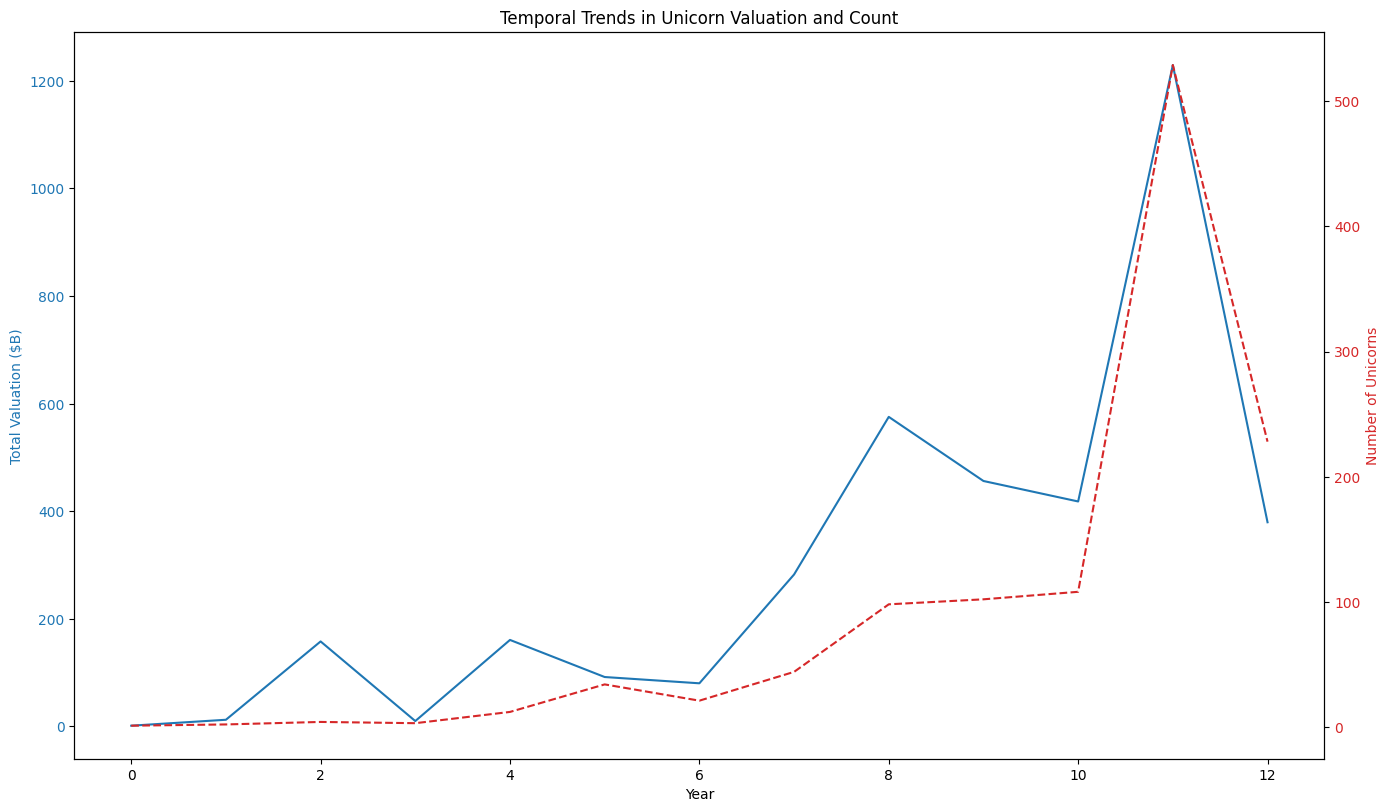

,Date Joined,Total Valuation ($B),Average Valuation ($B),Number of Unicorns,Total Valuation Growth (%),Unicorn Count Growth (%)
0,2007,1.38,1.380000,1,NaN,NaN
1,2011,12.40,6.200000,2,798.550725,100.000000
2,2012,158.00,39.500000,4,1174.193548,100.000000
3,2013,10.00,3.333333,3,-93.670886,-25.000000
4,2014,160.80,13.400000,12,1508.000000,300.000000
5,2015,91.85,2.701471,34,-42.879353,183.333333
6,2016,80.17,3.817619,21,-12.716385,-38.235294
7,2017,282.45,6.419318,44,252.313833,109.523810
8,2018,575.46,5.872041,98,103.738715,122.727273
9,2019,456.26,4.473137,102,-20.713864,4.081633


In [8]:
unicorns_data['Valuation ($B)'] = unicorns_data['Valuation ($B)'].str.replace('$', '').astype(float)
annual_data = unicorns_data.groupby(unicorns_data['Date Joined'].dt.year).agg({'Valuation ($B)': ['sum', 'mean'], 'Company': 'count'})
annual_data.columns = ['Total Valuation ($B)', 'Average Valuation ($B)', 'Number of Unicorns']
annual_data.reset_index(inplace=True)
annual_data['Total Valuation Growth (%)'] = annual_data['Total Valuation ($B)'].pct_change() * 100
annual_data['Unicorn Count Growth (%)'] = annual_data['Number of Unicorns'].pct_change() * 100
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(14, 8))
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Valuation ($B)', color=color)
ax1.plot(annual_data.index, annual_data['Total Valuation ($B)'], color=color, label='Total Valuation ($B)')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Unicorns', color=color)
ax2.plot(annual_data.index, annual_data['Number of Unicorns'], color=color, linestyle='--', label='Number of Unicorns')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Temporal Trends in Unicorn Valuation and Count')
plt.show()
annual_data[['Date Joined', 'Total Valuation ($B)', 'Average Valuation ($B)', 'Number of Unicorns', 'Total Valuation Growth (%)', 'Unicorn Count Growth (%)']]


## Geospatial Analysis

In [9]:
valuation_by_country = unicorns_data.groupby('Country').agg({'Valuation ($B)': ['sum', 'mean', 'count']})
valuation_by_country.columns = ['Total Valuation ($B)', 'Average Valuation ($B)', 'Number of Unicorns']
valuation_by_country = valuation_by_country.sort_values(by='Total Valuation ($B)', ascending=False)
valuation_by_city = unicorns_data.groupby('City ').agg({'Valuation ($B)': ['sum', 'mean', 'count']})
valuation_by_city.columns = ['Total Valuation ($B)', 'Average Valuation ($B)', 'Number of Unicorns']
valuation_by_city = valuation_by_city.sort_values(by='Total Valuation ($B)', ascending=False)
top_countries_by_valuation = valuation_by_country.head(10)
top_cities_by_valuation = valuation_by_city.head(10)
top_countries_by_valuation, top_cities_by_valuation


(                Total Valuation ($B)  Average Valuation ($B)  \
 Country                                                        
 United States                2069.89                3.254544   
 China                         678.59                3.899943   
 United Kingdom                205.45                4.466304   
 India                         202.92                2.898857   
 Germany                        80.88                2.788966   
 France                         58.42                2.434167   
 Australia                      54.40                6.800000   
 Canada                         49.23                2.591053   
 Israel                         48.02                2.182727   
 Brazil                         40.08                2.357647   
 
                 Number of Unicorns  
 Country                             
 United States                  636  
 China                          174  
 United Kingdom                  46  
 India                      

## Sectoral Growth Trends

In [10]:
unicorns_data['Year Joined'] = unicorns_data['Date Joined'].dt.year

industry_growth = unicorns_data.groupby(['Industry', 'Year Joined']).agg({'Valuation ($B)': ['sum', 'mean', 'count']})
industry_growth.columns = ['Total Valuation ($B)', 'Average Valuation ($B)', 'Number of Unicorns']
industry_growth = industry_growth.sort_values(by=['Industry', 'Year Joined'])
industry_growth.reset_index(inplace=True)
recent_year = industry_growth['Year Joined'].max()
industry_growth_recent = industry_growth[industry_growth['Year Joined'] == recent_year]
industry_growth_recent_sorted = industry_growth_recent.sort_values(by='Number of Unicorns', ascending=False)
industry_growth_recent_sorted.head(10)


,Industry,Year Joined,Total Valuation ($B),Average Valuation ($B),Number of Unicorns
72,Fintech,2022,91.66,1.666545,55
101,Internet software & services,2022,94.33,1.965208,48
89,Health,2022,29.63,1.481500,20
36,Cybersecurity,2022,22.45,1.403125,16
134,"Supply chain, logistics, & delivery",2022,21.55,1.539286,14
122,Other,2022,23.99,1.845385,13
55,E-commerce & direct-to-consumer,2022,17.81,1.484167,12
12,Artificial intelligence,2022,16.20,1.472727,11
20,Auto & transportation,2022,16.32,2.331429,7
43,Data management & analytics,2022,7.50,1.071429,7


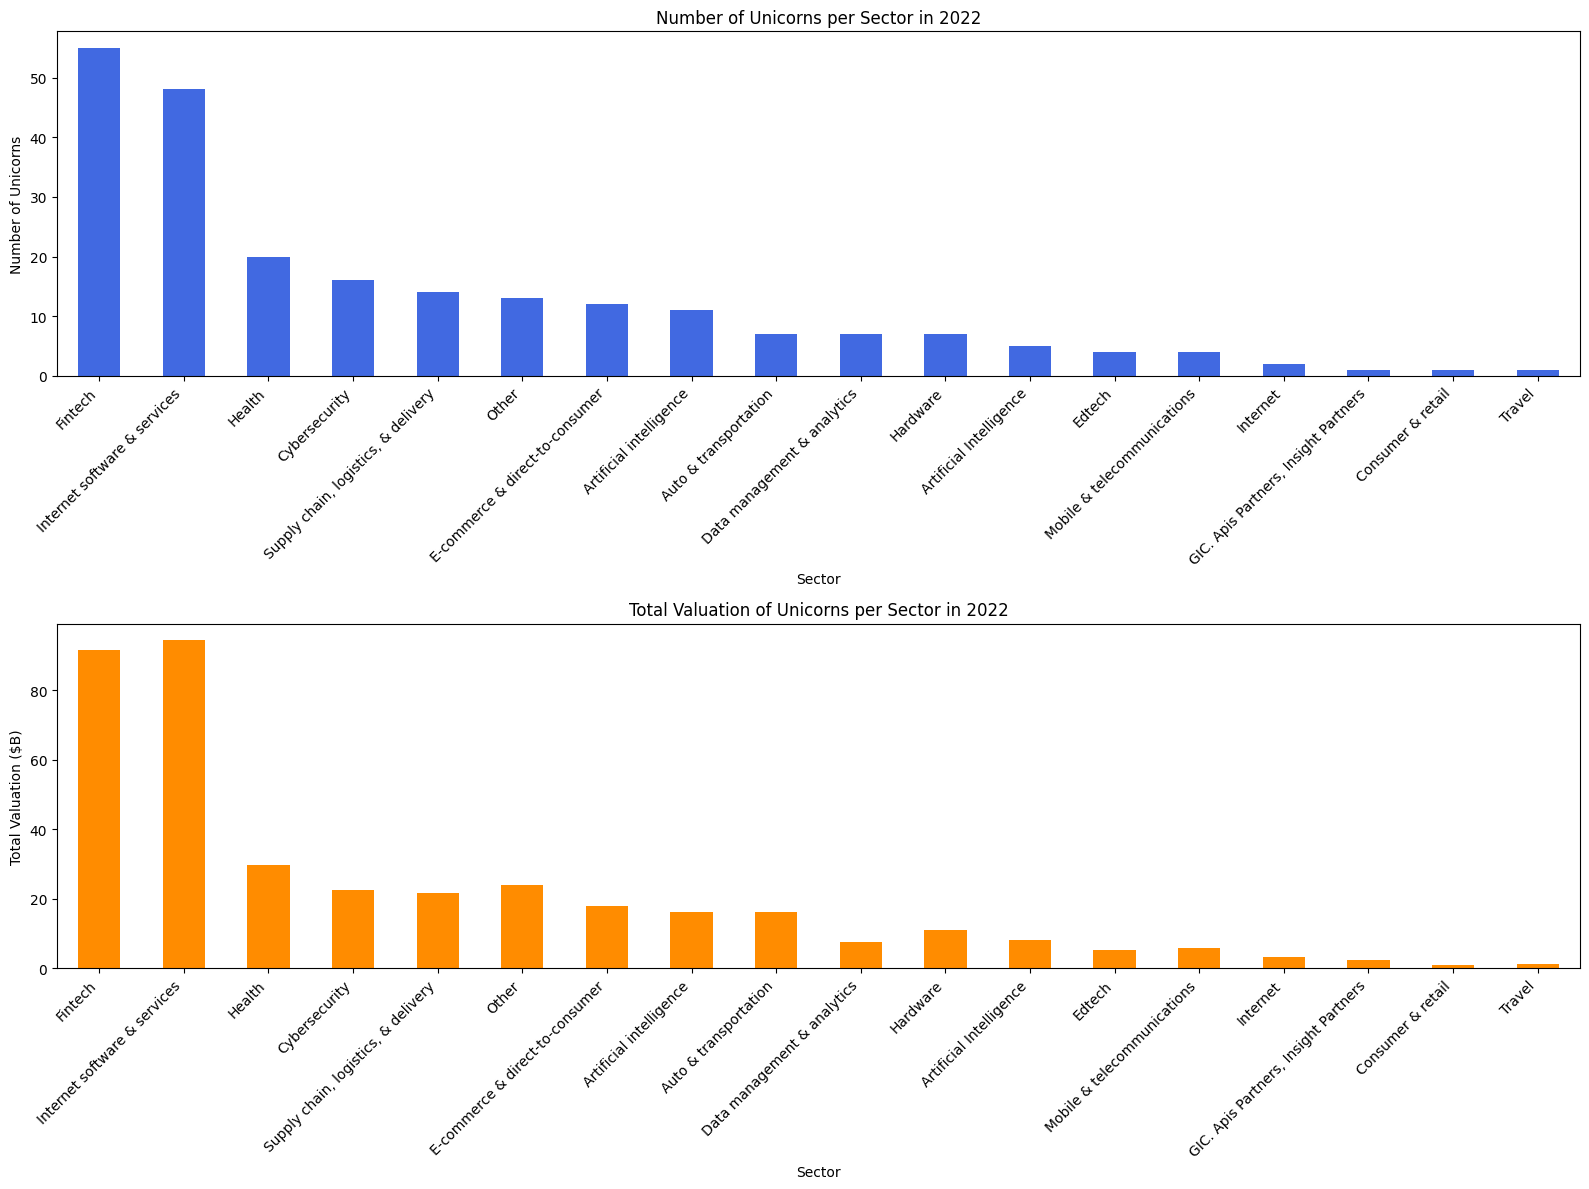

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(16, 12))  
industry_growth_recent_sorted.plot(kind='bar', x='Industry', y='Number of Unicorns', ax=ax[0], color='royalblue', legend=None)
ax[0].set_title('Number of Unicorns per Sector in 2022')
ax[0].set_xlabel('Sector')
ax[0].set_ylabel('Number of Unicorns')
ax[0].tick_params(axis='x', rotation=45) 
industry_growth_recent_sorted.plot(kind='bar', x='Industry', y='Total Valuation ($B)', ax=ax[1], color='darkorange', legend=None)
ax[1].set_title('Total Valuation of Unicorns per Sector in 2022')
ax[1].set_xlabel('Sector')
ax[1].set_ylabel('Total Valuation ($B)')
ax[1].tick_params(axis='x', rotation=45) 
for ax_ in ax:
    ax_.set_xticklabels(ax_.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()


Investor Impact on Startup Success:


In [12]:
import networkx as nx
edges = []
for _, row in unicorns_data.dropna(subset=['Investors']).iterrows():
    for investor in row['Investors'].split(', '):
        edges.append((investor, row['Company']))

G = nx.Graph()
G.add_edges_from(edges)

degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
centrality_df = pd.DataFrame({'Degree Centrality': degree_centrality, 'Betweenness Centrality': betweenness_centrality})
investor_centrality = centrality_df[centrality_df.index.str.contains('Capital|Ventures|Group|Investment|Partners')]
sorted_investor_centrality = investor_centrality.sort_values(by='Degree Centrality', ascending=False)
top_10_investors_by_degree = sorted_investor_centrality.head(10)

top_10_investors_by_degree


,Degree Centrality,Betweenness Centrality
Insight Partners,0.021057,0.082721
Sequoia Capital,0.020660,0.068168
Sequoia Capital China,0.018276,0.064147
Lightspeed Venture Partners,0.015495,0.060317
SoftBank Group,0.013905,0.040799
Index Ventures,0.013111,0.038046
Bessemer Venture Partners,0.011124,0.026197
Google Ventures,0.010727,0.027182
IDG Capital,0.010330,0.032996
Sequoia Capital India,0.009932,0.030569


creating a visualization that focuses on the top 10 investors identified by degree centrality and their directly connected startups.

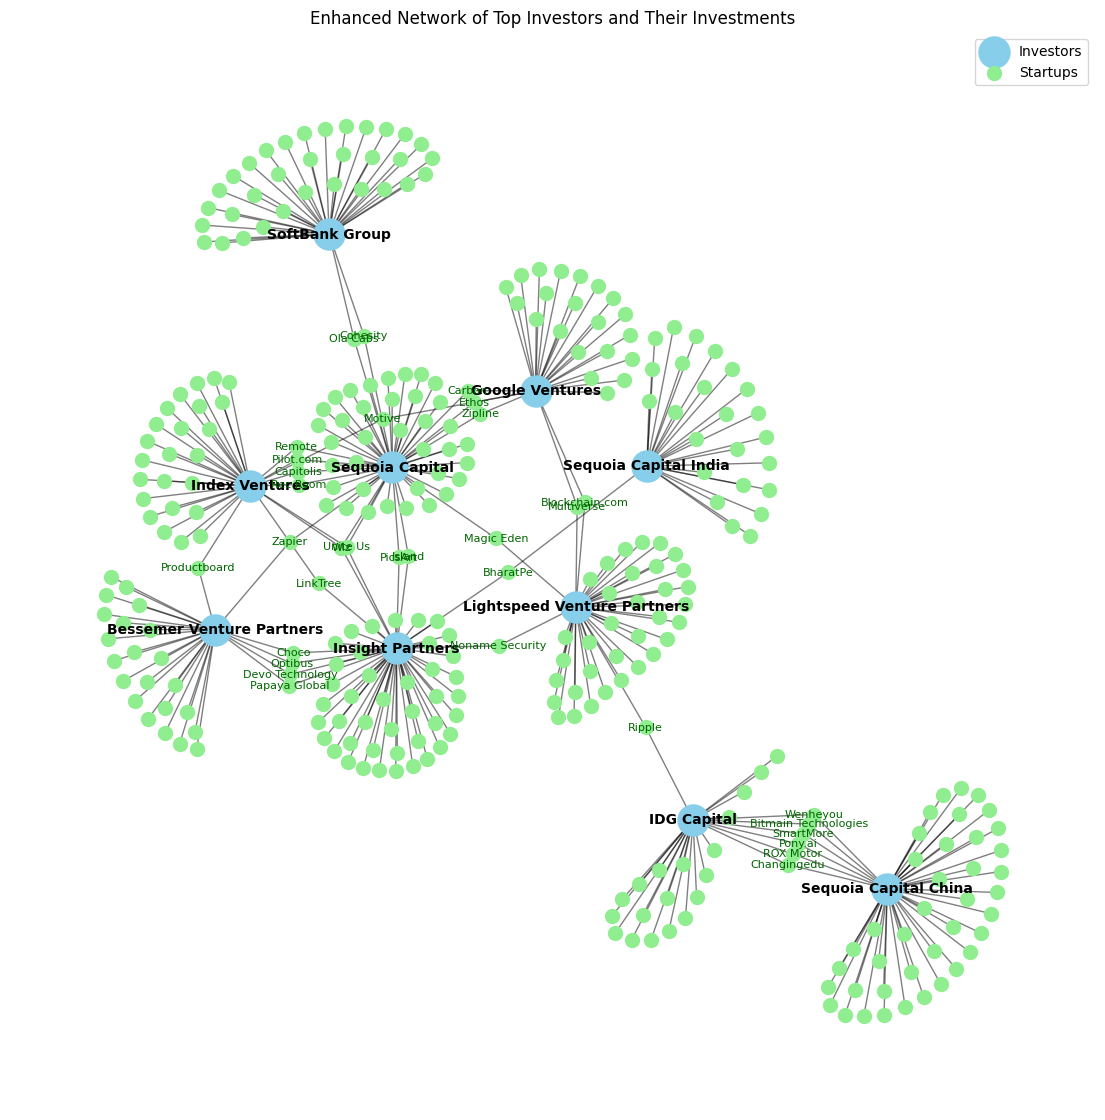

In [14]:
pos_kk = nx.kamada_kawai_layout(subG)
plt.figure(figsize=(14, 14))
nx.draw_networkx_nodes(subG, pos_kk, nodelist=investor_nodes, node_color='skyblue', label='Investors', node_size=500)
nx.draw_networkx_nodes(subG, pos_kk, nodelist=startup_nodes, node_color='lightgreen', label='Startups', node_size=100)
nx.draw_networkx_edges(subG, pos_kk, alpha=0.5)

nx.draw_networkx_labels(subG, pos_kk, labels={node: node for node in investor_nodes}, font_size=10, font_weight='bold')
startup_edges_count = Counter([edge[1] for edge in sub_edges if edge[1] in startup_nodes])
multi_investor_startups = [startup for startup, count in startup_edges_count.items() if count > 1]
selected_labels = {node: node for node in multi_investor_startups}
nx.draw_networkx_labels(subG, pos_kk, labels=selected_labels, font_size=8, font_color='darkgreen')
plt.title('Enhanced Network of Top Investors and Their Investments')
plt.legend()
plt.axis('off')
plt.show()


## Network Metrics

In [17]:
metrics = {
    'Number of Nodes': nx.number_of_nodes(subG),
    'Number of Edges': nx.number_of_edges(subG),
    'Average Degree': sum(dict(subG.degree()).values()) / nx.number_of_nodes(subG),
    'Density': nx.density(subG),
    'Average Clustering Coefficient': nx.average_clustering(subG),
    'Average Path Length': nx.average_shortest_path_length(subG) if nx.is_connected(subG) else "N/A",
    'Number of Connected Components': nx.number_connected_components(subG)
}

metrics


{'Number of Nodes': 339,
 'Number of Edges': 364,
 'Average Degree': 2.1474926253687316,
 'Density': 0.006353528477422283,
 'Average Clustering Coefficient': 0.0,
 'Average Path Length': 5.395192962245379,
 'Number of Connected Components': 1}